In [48]:
import pickle
with open("gene_to_RAM_usage.pickle", "rb") as fh:
   gene_to_RAM_usage = pickle.load(fh)
gene_to_RAM_usage

{'GC00003336_4': 65,
 'GC00001184': 200,
 'GC00000882_4': 153,
 'Cluster_7541': 118,
 'Cluster_8819': 88,
 'Cluster_483': 161,
 'GC00004324': 107,
 'GC00000702_23': 87,
 'GC00006699': 238,
 'Cluster_2999': 129,
 'GC00001242': 87,
 'GC00005266_6': 156,
 'GC00000725_1': 140,
 'Cluster_6786': 113,
 'GC00001564': 97,
 'GC00001377': 88,
 'GC00000001_5': 152,
 'Cluster_9966': 112,
 'GC00000528_1': 116,
 'GC00003229': 157,
 'Cluster_5765': 87,
 'GC00000009_6': 130,
 'GC00002264': 210,
 'Cluster_2036': 155,
 'GC00004809': 152,
 'GC00000684_5': 60,
 'GC00001043_1': 87,
 'GC00008960': 150,
 'GC00000018_2': 65,
 'Cluster_6584': 4,
 'GC00000344_r1_2': 140,
 'GC00000291_5': 159,
 'GC00000141_20': 133,
 'GC00003726_3': 156,
 'GC00000722_1': 280,
 'GC00004275_1': 99,
 'Cluster_3157': 87,
 'Cluster_5838': 65,
 'Cluster_5110': 67,
 'GC00004341_3': 62,
 'GC00000313_3': 123,
 'GC00003223_2': 79,
 'Cluster_7322': 149,
 'Cluster_3676': 84,
 'GC00003061_2': 87,
 'GC00001213_3': 127,
 'GC00006857': 65,
 'Clu

In [52]:
import pandas as pd
genes=[]
RAM_usages=[]
for gene, RAM in gene_to_RAM_usage.items():
    genes.append(gene)
    RAM_usages.append(RAM)
df = pd.DataFrame(data={"gene": genes, "RAM": RAM_usages})
df

,gene,RAM
0,GC00003336_4,65
1,GC00001184,200
2,GC00000882_4,153
3,Cluster_7541,118
4,Cluster_8819,88
...,...,...
10672,GC00009449,142
10673,Cluster_9570,88
10674,Cluster_9479,133
10675,GC00003846_5,65


In [58]:
genes_where_make_prg_took_10_GBs = df[df.RAM >= 1024*10]
genes_where_make_prg_took_10_GBs = genes_where_make_prg_took_10_GBs.sort_values(by="RAM", ascending=False)
genes_where_make_prg_took_10_GBs.to_csv("genes_where_make_prg_took_10_GBs.csv", index=False)
genes_where_make_prg_took_10_GBs

,gene,RAM
6409,GC00000027_6,114026
6745,GC00000012_98,27970
8245,GC00001075_7,27495
2380,GC00000984,21655
1748,GC00000162_5,20175
1474,GC00000191_6,15505
5535,GC00003225,15051


In [64]:
files_to_zip = list(map(lambda name: f"{name}.fa", genes_where_make_prg_took_10_GBs["gene"].tolist()))
print(f"zip genes_where_make_prg_took_10_GBs.zip {' '.join(files_to_zip)}")

zip genes_where_make_prg_took_10_GBs.zip GC00000027_6.fa GC00000012_98.fa GC00001075_7.fa GC00000984.fa GC00000162_5.fa GC00000191_6.fa GC00003225.fa


(array([1.0551e+04, 1.1900e+02, 6.0000e+00, 1.0000e+00]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

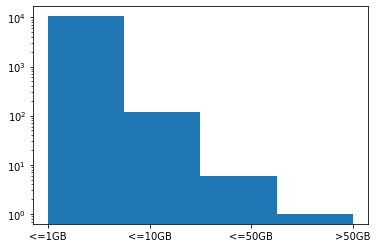

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_label(mem):
    if mem <= 1024:
        return "<=1GB"
    elif mem <= 1024*10:
        return "<=10GB"
    elif mem <= 1024*50:
        return "<=50GB"
    else:
        return ">50GB"

distribution_as_str = np.array([get_label(mem) for mem in distribution])
df = pd.DataFrame(data={"dist": distribution_as_str})
plt.hist(df.dist, histtype='bar', bins=4, log=True)